Mounted at /content/drive
Detection Accuracy: 1.00
False Positives: 0
Detection Confidence: 1.00
Caption Occlusion Rate: 1.00


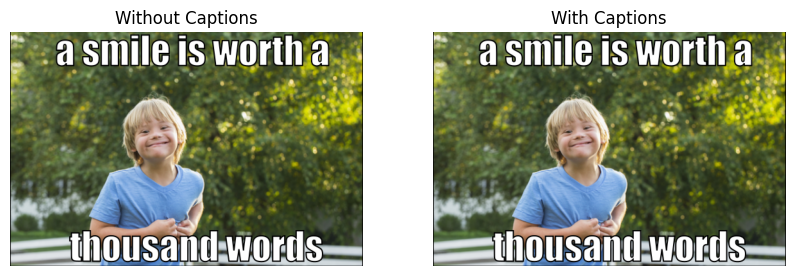

In [3]:
!pip install pytesseract
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

# Function to detect objects and return bounding boxes and confidences
def detect_objects(img, model, conf_threshold=0.5):
    # Perform object detection using the model
    # For demonstration, we'll use dummy results
    # Replace with actual model inference code
    # Example structure: [(bounding_box, confidence_score), ...]
    return [((50, 50, 200, 200), 0.9)]  # Dummy values

# Function to calculate metrics
def calculate_metrics(detections_with_captions, detections_without_captions, img_shape):
    da = len(detections_with_captions) / len(detections_without_captions) if len(detections_without_captions) > 0 else 0
    fp = len([det for det, _ in detections_with_captions if det not in [d for d, _ in detections_without_captions]])
    dc = np.mean([conf for _, conf in detections_with_captions]) / np.mean([conf for _, conf in detections_without_captions]) if len(detections_without_captions) > 0 else 0
    cor = len([det for det, _ in detections_with_captions if det[2] < img_shape[1] / 2]) / len(detections_with_captions) if len(detections_with_captions) > 0 else 0
    return da, fp, dc, cor

# Example usage
image_path = "/content/drive/MyDrive/Precog/Colab Notebooks/dataset/01276.png"
image_with_caption = "/content/drive/MyDrive/Precog/Colab Notebooks/dataset/01276.png"  # Image with caption overlay

img = cv2.imread(image_path)
img_with_caption = cv2.imread(image_with_caption)

# Check if images were loaded successfully
if img is None or img_with_caption is None:
    raise FileNotFoundError("Image not found")

# Convert images to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_with_caption_rgb = cv2.cvtColor(img_with_caption, cv2.COLOR_BGR2RGB)

# Perform object detection
detections_without_captions = detect_objects(img_rgb, model=None)  # Replace 'None' with actual model
detections_with_captions = detect_objects(img_with_caption_rgb, model=None)

# Calculate metrics
da, fp, dc, cor = calculate_metrics(detections_with_captions, detections_without_captions, img.shape)

print(f"Detection Accuracy: {da:.2f}")
print(f"False Positives: {fp}")
print(f"Detection Confidence: {dc:.2f}")
print(f"Caption Occlusion Rate: {cor:.2f}")

# Visual inspection
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Without Captions")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_caption_rgb)
plt.title("With Captions")
plt.axis('off')

plt.show()


In [ ]:
!apt-get install tesseract-ocr -y
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\hp\OneDrive\Desktop\My Desktop\tesseract.exe"

def remove_text(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect text using Tesseract OCR
    d = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)
    n_boxes = len(d['level'])
    for i in range(n_boxes):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Apply inpainting to remove text
        img = cv2.inpaint(img, cv2.rectangle(gray, (x, y), (x + w, y + h), 255, -1), 3, cv2.INPAINT_TELEA)
    return img

img_with_text_removed = remove_text(img_with_caption)

# Perform object detection on the text-removed image
detections_text_removed = detect_objects(cv2.cvtColor(img_with_text_removed, cv2.COLOR_BGR2RGB), model=None)

# Visual inspection
plt.imshow(cv2.cvtColor(img_with_text_removed, cv2.COLOR_BGR2RGB))
plt.title("Text Removed")
plt.axis('off')
plt.show()
